# <center> Assignment: kNN Implementation (mean trials per neighbor)
## `Professor: Matthew R. Maulion, MSc`
## `Student: Christian Jay Baguio`
### DS3A

# Imports

In [8]:
# !pip install -U scikit-learn
!pip install mglearn

   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ------------------ --------------------- 262.1/581.4 kB ? eta -:--:--
   ------------------ --------------------- 262.1/581.4 kB ? eta -:--:--
   ------------------ --------------------- 262.1/581.4 kB ? eta -:--:--
   ------------------ --------------------- 262.1/581.4 kB ? eta -:--:--
   ------------------ --------------------- 262.1/581.4 kB ? eta -:--:--
   ------------------ --------------------- 262.1/581.4 kB ? eta -:--:--
   ------------------ --------------------- 262.1/581.4 kB ? eta 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

#sklearn and mglearn lib
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import mglearn #library provided by amueller
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn import datasets
sns.set_theme(font='Times New Roman')

In [15]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [16]:
tf.config.list_physical_devices('GPU')

[]

# `Classifying Iris species`

Let’s assume that a hobby botanist is interested in distinguishing what the species is of
some iris flowers that she found. She has collected some measurements associated
with the iris: the length and width of the petals, and the length and width of the sepal,
all measured in centimeters.

She also has the measurements of some irises that have been previously identified by
an expert botanist as belonging to the species Setosa, Versicolor or Virginica. For
these measurements, she can be certain of which species each iris belongs to. Let’s
assume that these are the only species our hobby botanist will encounter in the wild.
Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris.

<img src="flower.jpg">

Since we have measurements for which we know the correct species of iris, this is a
supervised learning problem. In this problem, we want to predict one of several
options (the species of iris). This is an example of a classification problem. The possible
outputs (different species of irises) are called classes.
Since every iris in the dataset belongs to one of three classes this problem is a threeclass
classification problem.

The desired output for a single data point (an iris) is the species of this flower. For a
particular data point, the species it belongs to is called its label.

**Meet the data**

The data we will use for this example is the iris dataset, a classical dataset in machine
learning an statistics.
It is included in scikit-learn in the dataset module. We can load it by calling the
load_iris function:

In [10]:
#Load Dataset

iris_dataset = load_iris()

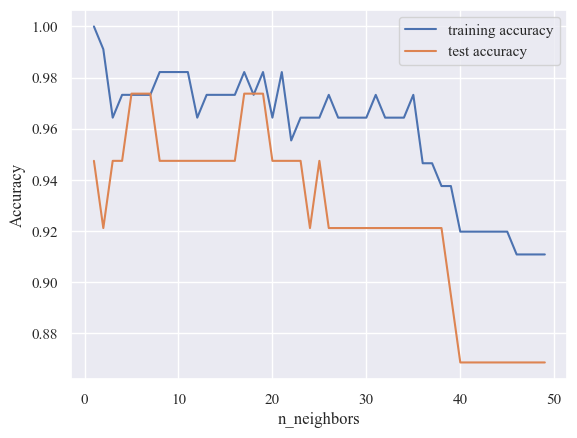

In [11]:
#Original Without Trials
X_train, X_test, y_train, y_test = tts(iris_dataset['data'], iris_dataset['target'], test_size=0.25,
random_state=143)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

### `Iris Graph With 50 Trials`

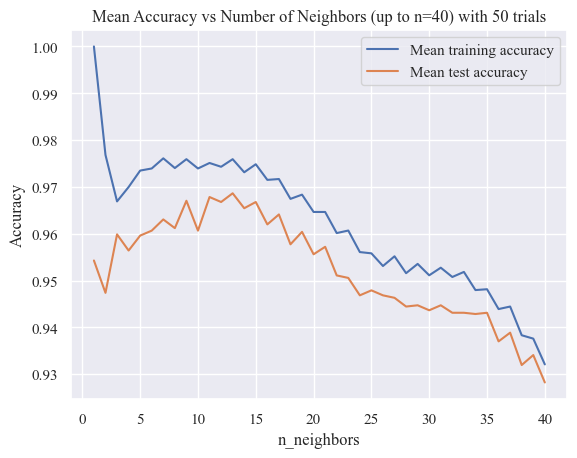

In [17]:
#With 50 Trials each neighbor
neighbors_settings = range(1, 41)

#Perform 50 trials
num_trials = range(1, 51)

training_accuracy = []
test_accuracy = []

#Iterate over different values of n_neighbors
for n_neighbors in neighbors_settings:
    
    #mag initialize og blank lists para ma store ang accuracies for 50 trials
    trial_training_accuracy = []
    trial_test_accuracy = []
    
    for trial_nums in num_trials:
        irisX_train, irisX_test, irisy_train, irisy_test = tts(iris_dataset['data'], iris_dataset['target'], test_size=0.25, random_state=trial_nums)
        
        #Create KNN classifier
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        #Fit the classifier on training data
        clf.fit(irisX_train, irisy_train)
        
        #Record training set accuracy
        trial_training_accuracy.append(clf.score(irisX_train, irisy_train))
        
        #Record test set accuracy
        trial_test_accuracy.append(clf.score(irisX_test, irisy_test))
    
    #Calculate mean accuracy for each value of n_neighbors
    training_accuracy.append(np.mean(trial_training_accuracy))
    test_accuracy.append(np.mean(trial_test_accuracy))

#E plot ang mean accuracy vs n_neighbors
plt.plot(neighbors_settings, training_accuracy, label="Mean training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Mean test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("Mean Accuracy vs Number of Neighbors (up to n=40) with 50 trials")
plt.legend()
plt.show()

`After conducting 50 trials and getting the mean plot accuracy, we can now come up with an optimal number of neighbors of around 5 and 11 due to the distance peak between train and test. both 2 have a nearby peak with each other and its optimal because the model only overfit a small portion to the test rather than comparing it to other results.`

# `Boston Cancer Data`

Boston Cancer Data Wisconsin breast cancer dataset (or cancer for
short, read cancer.DESC if you want to learn more), which records clinical measurements of breast cancer tumors. Each tumor is
labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and
the task is to learn to predict whether a tumor is malignant based on the measurements
of the tissue.
The data can be loaded using the load_breast_cancer from scikit-learn. Datasets
that are included in scikit-learn are usually stored as Bunch objects, which contain
some information about the dataset as well as the actual data.
All you need to know about Bunch objects is that they behave like dictionaries, with
the added benefit that you can access values using a dot (as in bunch.key instead of
bunch['key']).

In [4]:
cancer_dataset = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer_dataset.keys()))

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


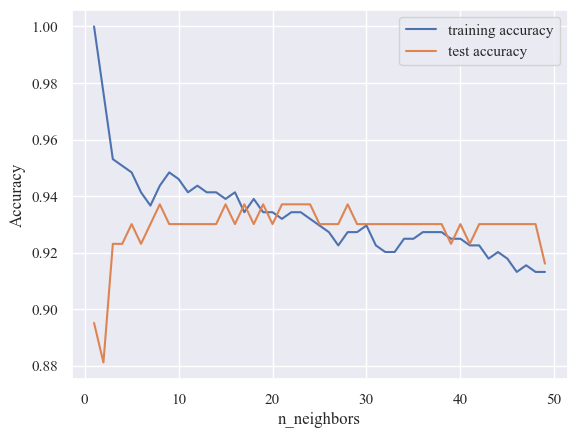

In [5]:
#Original Without Trials
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset['data'],cancer_dataset['target'], 
                                                    test_size=0.25,random_state=20)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

### `Boston Graph With 50 Trials`

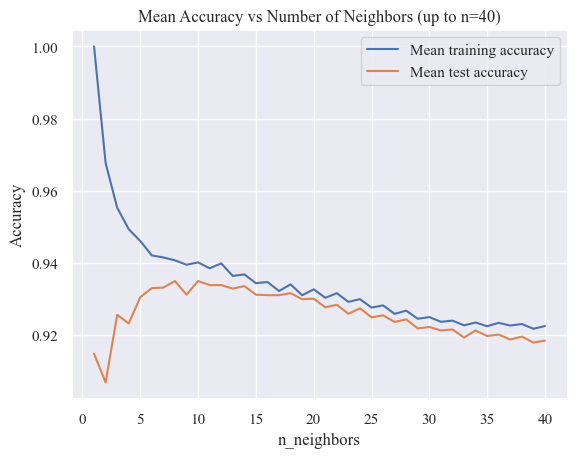

In [7]:
#With 50 Trials each neighbor
neighbors_settings = range(1, 41)

#Perform 50 trials
num_trials = range(1, 51)

training_accuracy = []
test_accuracy = []

#Iterate over different values of n_neighbors
for n_neighbors in neighbors_settings:
    
    #mag initialize og blank lists para ma store ang accuracies for 50 trials
    trial_training_accuracy = []
    trial_test_accuracy = []
    
    for trial_nums in num_trials:
        bostonX_train, bostonX_test, bostony_train, bostony_test = tts(cancer_dataset['data'],cancer_dataset['target'], 
                                                    test_size=0.25, random_state=trial_nums)
        
        #Create KNN classifier
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        #Fit the classifier on training data
        clf.fit(bostonX_train, bostony_train)
        
        #Record training set accuracy
        trial_training_accuracy.append(clf.score(bostonX_train, bostony_train))
        
        #Record test set accuracy
        trial_test_accuracy.append(clf.score(bostonX_test, bostony_test))
    
    #Calculate mean accuracy for each value of n_neighbors
    training_accuracy.append(np.mean(trial_training_accuracy))
    test_accuracy.append(np.mean(trial_test_accuracy))

#E plot ang mean accuracy vs n_neighbors
plt.plot(neighbors_settings, training_accuracy, label="Mean training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Mean test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("Mean Accuracy vs Number of Neighbors (up to n=40) with 50 trials")
plt.legend()
plt.show()

`After passing 50 trials in the model and getting the result of mean plot accuracy, the optimal number of neighbors that has the highest accuracy would be in between 17 and 19 because of its nearby peak between train and test.`

In [8]:
df=pd.DataFrame.from_dict(cancer_dataset['data']) #Feature variables
df.columns=cancer_dataset['feature_names'] #ADD the feature_names as column labels
df['Target'] = cancer_dataset['target'] #ADD the target as another column
df.head(10) #DISPLAY the first five rows

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [9]:
select_columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','Target']
cancer_dataset_group1 = pd.DataFrame(df, columns=select_columns) #Consider only the columns given and call it group 1
df1=cancer_dataset_group1
df1.head()

select_columns = ['worst concavity','worst smoothness', 'worst symmetry', 'worst fractal dimension','Target']
cancer_dataset_group2 = pd.DataFrame(df, columns=select_columns) #Consider only the columns given and call it group 1
df2=cancer_dataset_group2
df2.head()

df = cancer_dataset_group2
df_features=df.drop('Target', axis=1)


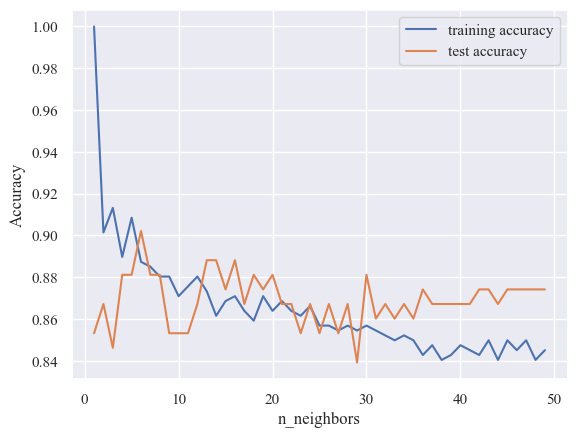

In [10]:
#Original Without Trials
X_train, X_test, y_train, y_test = tts(df_features,df['Target'], 
                                                    test_size=0.25,random_state=20)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

### `Boston Graph With 50 Trials`

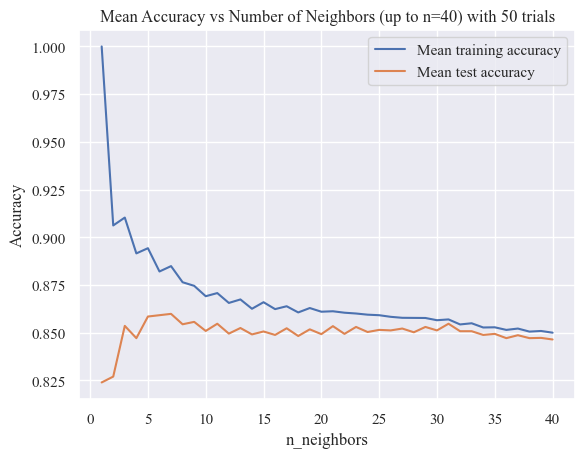

In [10]:
#With 50 Trials each neighbor
neighbors_settings = range(1, 41)

#Perform 50 trials
num_trials = range(1, 51)

training_accuracy = []
test_accuracy = []

#Iterate over different values of n_neighbors
for n_neighbors in neighbors_settings:
    
    #mag initialize og blank lists para ma store ang accuracies for 50 trials
    trial_training_accuracy = []
    trial_test_accuracy = []
    
    for trial_nums in num_trials:
        bostonX_train, bostonX_test, bostony_train, bostony_test = tts(df_features,df['Target'], 
                                                    test_size=0.25, random_state=trial_nums)
        
        #Create KNN classifier
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        #Fit the classifier on training data
        clf.fit(bostonX_train, bostony_train)
        
        #Record training set accuracy
        trial_training_accuracy.append(clf.score(bostonX_train, bostony_train))
        
        #Record test set accuracy
        trial_test_accuracy.append(clf.score(bostonX_test, bostony_test))
    
    #Calculate mean accuracy for each value of n_neighbors
    training_accuracy.append(np.mean(trial_training_accuracy))
    test_accuracy.append(np.mean(trial_test_accuracy))

#E plot ang mean accuracy vs n_neighbors
plt.plot(neighbors_settings, training_accuracy, label="Mean training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Mean test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("Mean Accuracy vs Number of Neighbors (up to n=40) with 50 trials")
plt.legend()
plt.show()

`After passing 50 trials in the model and getting the result of mean plot accuracy, the possible optimal number of neighbors would be 31 and 32 because of its consistency between train and test nearby distance which seems less overfit result`

# `UP College Admission Test  (UPCAT) Prediction`

Given here are actual class performance of 100 students who took the UPCAT of a school based in Metro Manila. Information contains the grades of each of the students in English, Math, Science together with their general weighted averages from grades 7-9. An IQ test conducted by the school is also made available together with a confidentially measured variable abbreviated as SA.  Explore how accurate can k-NN forecast UPCAT passers (pass=1, fail=0) and what is the optimal nearest-neighbor parameter.

A. Make a scattermatrix of the features.

B. Use kNN and comment on the optimal choice of **n_neighbors**.

C. Tell a story about the system: predictability, value of the result(s), or any interesting ideas.

In [15]:
df_UPCAT = pd.read_excel('UPCAT_DATA2.xlsx')
df_UPCAT.head()
df = df_UPCAT.dropna()

df_UPCATfeature = df.drop('Target', axis=1)
df_UPCATtarget = df['Target']

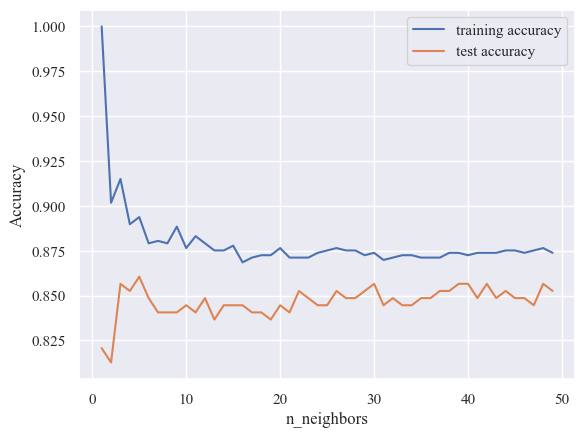

In [16]:
hello=4
upcatX_train, upcatX_test, upcaty_train, upcaty_test = tts(df_UPCATfeature,df_UPCATtarget, 
                                                    test_size=0.25,random_state=hello)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(upcatX_train, upcaty_train)
    # record training set accuracy
    z = knn.score(upcatX_train, upcaty_train)
    x = knn.score(upcatX_test, upcaty_test)
    training_accuracy.append(z)
    # record generalization accuracy
    test_accuracy.append(x)
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

### `Upcat Graph With 50 Trials`

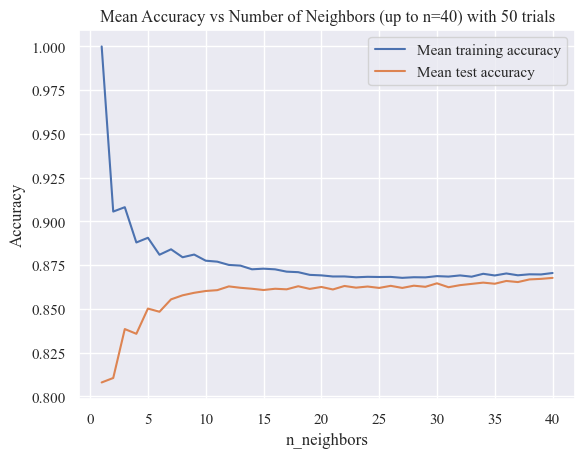

In [17]:
#With 50 Trials each neighbor
neighbors_settings = range(1, 41)

#Perform 50 trials
num_trials = range(1, 51)

training_accuracy = []
test_accuracy = []

#Iterate over different values of n_neighbors
for n_neighbors in neighbors_settings:
    
    #mag initialize og blank lists para ma store ang accuracies for 50 trials
    trial_training_accuracy = []
    trial_test_accuracy = []
    
    for trial_nums in num_trials:
        upcatX_train, upcatX_test, upcaty_train, upcaty_test = tts(df_UPCATfeature,df_UPCATtarget, 
                                                    test_size=0.25, random_state=trial_nums)
        
        #Create KNN classifier
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        #Fit the classifier on training data
        clf.fit(upcatX_train, upcaty_train)
        
        #Record training set accuracy
        trial_training_accuracy.append(clf.score(upcatX_train, upcaty_train))
        
        #Record test set accuracy
        trial_test_accuracy.append(clf.score(upcatX_test, upcaty_test))
    
    #Calculate mean accuracy for each value of n_neighbors
    training_accuracy.append(np.mean(trial_training_accuracy))
    test_accuracy.append(np.mean(trial_test_accuracy))

#E plot ang mean accuracy vs n_neighbors
plt.plot(neighbors_settings, training_accuracy, label="Mean training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Mean test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("Mean Accuracy vs Number of Neighbors (up to n=40) with 50 trials")
plt.legend()
plt.show()

The optimal number of neighbors would in between 38 to 40 because of its consistency between train and test nearby distance which seems less overfit result.